### **Clustering with K-Means**


1.   Load and visualize dataset (optional PCA for 2D view)
2.   Fit K-Means and assign cluster labels.
3.   Use the Elbow Method to find optimal K.
4.   Visualize clusters with color-coding.
5.   Evaluate clustering using Silhouette Score.



Load and visualize dataset (optional PCA for 2D view)

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("/content/Mall_Customers.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

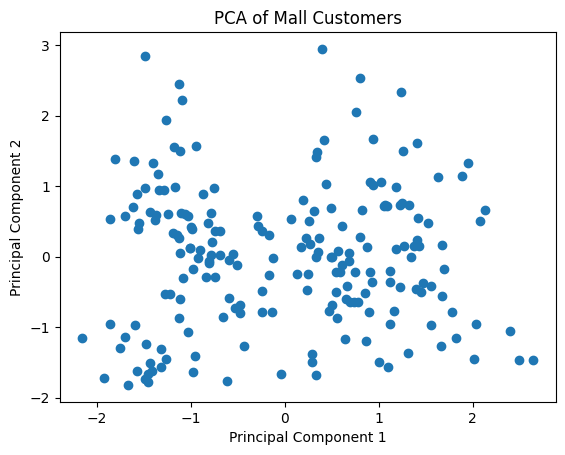

In [7]:
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

plt.scatter(features_pca[:, 0], features_pca[:, 1])
plt.title('PCA of Mall Customers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Fit K-Means and Assign Cluster Labels

In [8]:
from sklearn.cluster import KMeans

In [9]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        2  
1        2  
2        2  
3        2  
4        2  


Use the Elbow Method to Find Optimal K

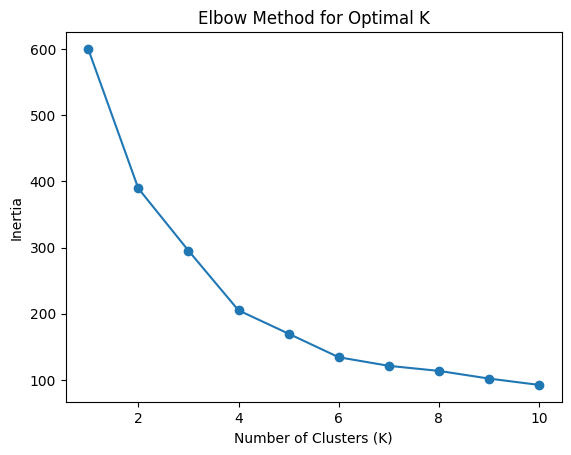

In [10]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

Visualize Clusters with Color-Coding

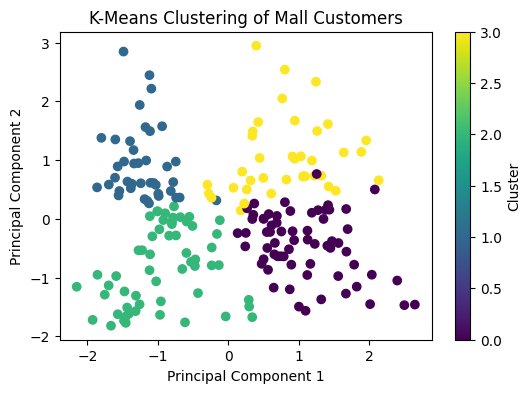

In [11]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)

plt.figure(figsize=(6, 4))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=df['Cluster'], cmap='viridis', marker='o')
plt.title('K-Means Clustering of Mall Customers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

Evaluate Clustering Using Silhouette Score

In [12]:
from sklearn.metrics import silhouette_score

In [13]:
silhouette_avg = silhouette_score(features_scaled, df['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.4039582785148566
